In [1]:
#We will visualise the effects of interpolation here

In [2]:
import torch
import skimage as sk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os


In [3]:
image_path = "/workspaces/masters_project/data/warcraft_shortest_path_oneskin/12x12/train_maps.npy"

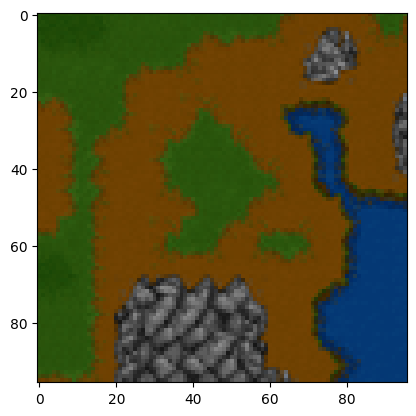

In [4]:
#plot the image
image = np.load(image_path)[0]
plt.imshow(image)
plt.show()

torch.Size([96, 96, 3])
torch.Size([3, 96, 96])
torch.Size([1, 3, 96, 96])
torch.Size([1, 3, 48, 48])
(48, 48, 3)


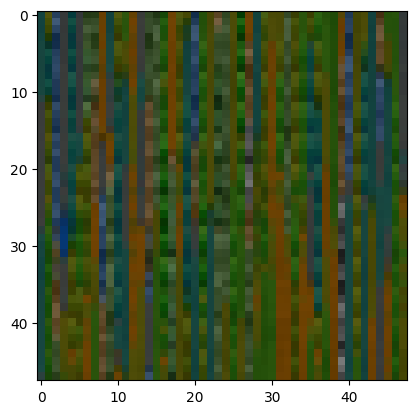

In [44]:
#do the bilinear interpolation
image_1 = torch.from_numpy(image) #this is [96, 96, 3]
print(image_1.shape)
image_1 = image_1.transpose(0,2) #this is [3, 96, 96]
print(image_1.shape)
image_1 = image_1.unsqueeze(0)
#transpose the image to be [1, 3, 96, 96]
#image_1 = image_1.transpose(1,3).unsqueeze(0)
print(image_1.shape)
image_1 = torch.nn.functional.interpolate(image_1, size=(48, 48), mode='bilinear',
                                          antialias=False)
print(image_1.shape)
image_2 = image_1.squeeze(0).squeeze(0).numpy()
image_2 = image_2.transpose(1,2,0)
#rotate the image 90 degrees
image_2 = np.rot90(image_2, k=1, axes=(0,1))
image_2 = np.rot90(image_2, k=1, axes=(0,1))
image_2 = np.rot90(image_2, k=1, axes=(0,1))
#flip the image 
image_2 = np.fliplr(image_2)

print(image_2.shape)
plt.imshow(image_2)

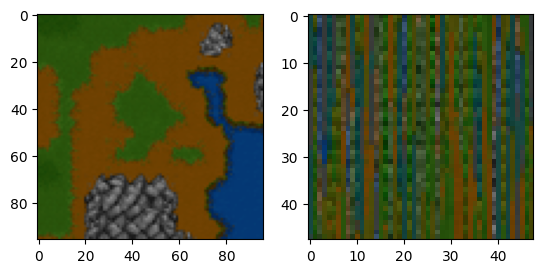

In [45]:
#plot them side by side
fig, axs = plt.subplots(1,2)
axs[0].imshow(image)
axs[1].imshow(image_2)
plt.show()


# Lets try SLIP from skimage


(48, 48)


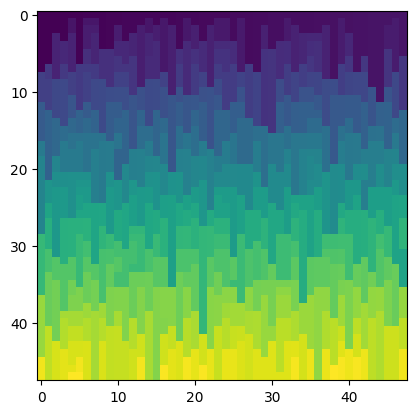

In [7]:
from skimage.segmentation import slic
#apply slic to the image
segments = slic(image_2, n_segments=1000, compactness=0.01, sigma=0.01)
print(segments.shape)
plt.imshow(segments)
plt.show()


(96, 96)
[(0, 0), (1, 1), (2, 2), (3, 3), (3, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (5, 12), (5, 13), (6, 14), (6, 15), (6, 16), (7, 17), (8, 18), (8, 19), (9, 20), (9, 21), (9, 22), (9, 23), (10, 24), (11, 25), (12, 26), (13, 27), (14, 28), (15, 29), (15, 30), (15, 31), (15, 32), (15, 33), (15, 34), (16, 35), (17, 36), (18, 37), (19, 38), (20, 39), (21, 40), (22, 41), (23, 42), (24, 43), (25, 44), (26, 45), (27, 46), (27, 47), (27, 48), (27, 49), (27, 50), (27, 51), (27, 52), (27, 53), (27, 54), (27, 55), (27, 56), (27, 57), (27, 58), (27, 59), (27, 60), (27, 61), (27, 62), (27, 63), (27, 64), (28, 65), (29, 66), (30, 67), (31, 68), (31, 69), (32, 70), (33, 71), (34, 72), (35, 72), (36, 72), (37, 73), (38, 74), (39, 75), (40, 76), (41, 77), (42, 77), (43, 77), (44, 78), (45, 79), (46, 80), (47, 80), (48, 80), (49, 80), (50, 80), (51, 81), (52, 82), (53, 82), (54, 82), (55, 82), (56, 82), (57, 82), (58, 82), (59, 82), (60, 82), (61, 82), (62, 82), (63, 82), (64,

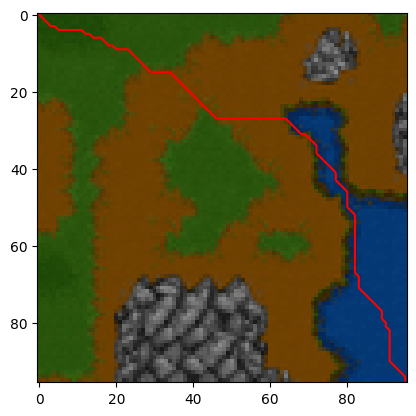

In [8]:
#use skimage to find the shortest path
from skimage.graph import shortest_path
from skimage.graph import route_through_array
from skimage.util import img_as_float

#convert the image to float
image_3 = img_as_float(image)
#convert image_3 to grayscale
image_4 = sk.color.rgb2gray(image_3)

print(image_4.shape)
#find the shortest path
path, cost = route_through_array(image_4, (0, 0), (95, 95), fully_connected=True)
#visualise image and path
print(path)
fig, ax = plt.subplots()
ax.imshow(image_3, interpolation='nearest')

#plot all the points in the path
path_arr = np.array(path)
ax.plot(path_arr[:, 1], path_arr[:, 0], '-r')




In [9]:
torch_tensor.shape

NameError: name 'torch_tensor' is not defined

In [63]:
from torch_geometric.transforms import ToSLIC
transform_slic = ToSLIC(n_segments=12,
                        add_img=True, channel_axis=-1)
#convert image 2 to black and white
image_3 = sk.color.rgb2gray(image)
torch_tensor = torch.tensor(image_3).contiguous()
graph = transform_slic(torch_tensor.unsqueeze(-1))
graph

Data(x=[12, 96], pos=[12, 2], img=[1, 96, 96, 1])

In [64]:
image_2

array([[[ 19,  67,  63],
        [ 82,  83,  11],
        [ 37,  63,  92],
        ...,
        [ 37,  80,  10],
        [ 39,  82,  11],
        [ 51,  57,  58]],

       [[ 18,  66,  62],
        [ 68,  78,   6],
        [ 63,  89, 119],
        ...,
        [ 38,  81,  10],
        [ 36,  80,  10],
        [ 53,  58,  58]],

       [[ 17,  65,  62],
        [ 60,  71,   3],
        [ 42,  68,  98],
        ...,
        [ 38,  80,  10],
        [ 36,  80,  10],
        [ 52,  57,  58]],

       ...,

       [[ 23,  71,  65],
        [ 29,  83,  10],
        [ 58,  79,  43],
        ...,
        [ 97,  66,   3],
        [ 36,  92,  14],
        [ 66,  67,   4]],

       [[ 26,  73,  66],
        [ 19,  75,   6],
        [ 62,  83,  47],
        ...,
        [104,  63,   2],
        [ 25,  81,   9],
        [ 66,  66,   3]],

       [[ 43,  65,  62],
        [ 24,  68,   7],
        [ 40,  61,  25],
        ...,
        [ 93,  68,   6],
        [ 25,  69,   8],
        [ 68,  69,   4]]

In [65]:
graph

Data(x=[12, 96], pos=[12, 2], img=[1, 96, 96, 1])

In [66]:
graph.x[0]

tensor([0.2383, 0.2318, 0.2362, 0.2365, 0.2305, 0.2359, 0.2412, 0.2377, 0.2471,
        0.2531, 0.2649, 0.2706, 0.2761, 0.2785, 0.2735, 0.2742, 0.2743, 0.2731,
        0.2742, 0.2740, 0.2742, 0.2855, 0.2919, 0.2761, 0.2715, 0.2698, 0.2728,
        0.2749, 0.2739, 0.2762, 0.2784, 0.2708, 0.2771, 0.2713, 0.2793, 0.2797,
        0.2768, 0.2709, 0.2742, 0.2695, 0.2722, 0.2787, 0.2741, 0.2726, 0.2744,
        0.2753, 0.2782, 0.2714, 0.2776, 0.2711, 0.2779, 0.2777, 0.2810, 0.2809,
        0.2774, 0.2812, 0.2667, 0.2735, 0.2808, 0.2758, 0.2681, 0.2681, 0.2644,
        0.2529, 0.2460, 0.2378, 0.2383, 0.2353, 0.2305, 0.2363, 0.2397, 0.2449,
        0.2570, 0.2565, 0.2643, 0.2684, 0.2737, 0.2739, 0.2700, 0.2709, 0.2721,
        0.2696, 0.2729, 0.2718, 0.2737, 0.2739, 0.2700, 0.2709, 0.2721, 0.2696,
        0.2729, 0.2718, 0.2771, 0.2830, 0.2703, 0.2640], dtype=torch.float64)

In [67]:
def convert_graph_to_image(graph, shape=48):
    #create a 48x48 empty image
    image = np.zeros((shape, shape))
    #now look at graph.x and graph.pos and fill in the image
    for i in range(graph.x.shape[0]):
        x = int(graph.pos[i][0])
        y = int(graph.pos[i][1])
        image[x][y] = graph.x[i][0]
    return image

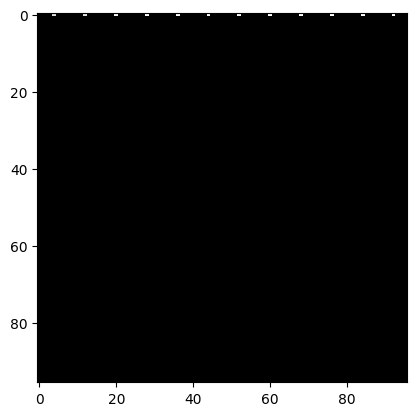

In [68]:
new_image = convert_graph_to_image(graph, shape=96)
#plot the image
plt.imshow(new_image, cmap='gray')

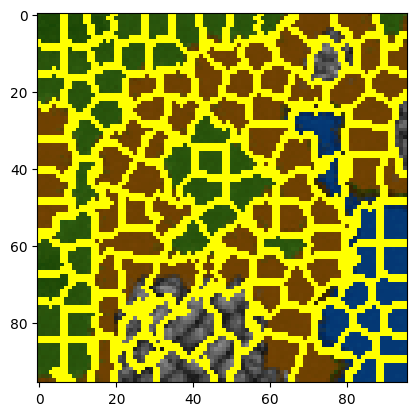

In [83]:
#use normal slic on the image
from skimage.segmentation import slic
#apply slic to the image
segments = slic(image, n_segments=200, compactness=10, sigma=0.0)

#plot the segments as a boundary
from skimage.segmentation import mark_boundaries
boundaries = mark_boundaries(image, segments)
plt.imshow(boundaries)


plt.show()

In [103]:
segments.shape

(96, 96)

In [104]:
#use the segments to plot the superpixels in a new image
new_image = np.zeros((96, 96, 3))
#the segments are a 2d array of the same size as the image, and they assign
#where each pixel belongs to a superpixel, so use the superpixel classification
#to calculate the average colour of each superpixel

#first, find the unique values in segments
unique_segments = np.unique(segments)
print(unique_segments.shape)
#now iterate through each unique segment and find the average colour of that segment
for segment in unique_segments:
    #find the indices of the segment
    indices = np.where(segments == segment)
    #find the average colour of the segment
    average_colour = np.mean(image[indices], axis=0)
    #now set the new image to have the average colour in the segment
    new_image[indices] = average_colour
#plot the new image
print(new_image)

(123,)
[[[ 30.88709677  74.29032258   6.98387097]
  [ 30.88709677  74.29032258   6.98387097]
  [ 30.88709677  74.29032258   6.98387097]
  ...
  [ 61.77192982  77.52631579   9.07017544]
  [ 61.77192982  77.52631579   9.07017544]
  [ 61.77192982  77.52631579   9.07017544]]

 [[ 30.88709677  74.29032258   6.98387097]
  [ 30.88709677  74.29032258   6.98387097]
  [ 30.88709677  74.29032258   6.98387097]
  ...
  [ 61.77192982  77.52631579   9.07017544]
  [ 61.77192982  77.52631579   9.07017544]
  [ 61.77192982  77.52631579   9.07017544]]

 [[ 30.88709677  74.29032258   6.98387097]
  [ 30.88709677  74.29032258   6.98387097]
  [ 30.88709677  74.29032258   6.98387097]
  ...
  [ 61.77192982  77.52631579   9.07017544]
  [ 61.77192982  77.52631579   9.07017544]
  [ 61.77192982  77.52631579   9.07017544]]

 ...

 [[ 50.28        80.66666667  10.30666667]
  [ 50.28        80.66666667  10.30666667]
  [ 50.28        80.66666667  10.30666667]
  ...
  [  4.21428571  56.42857143 116.26190476]
  [  4.2142

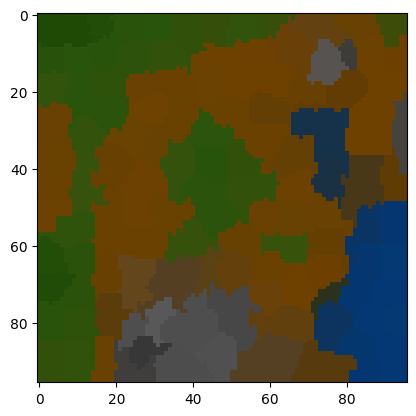

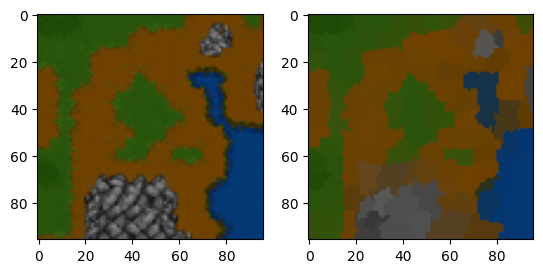

In [102]:
#rescale the image
new_image = new_image / 255
plt.imshow(new_image)

#plot this alongside the original image
fig, axs = plt.subplots(1,2)
axs[0].imshow(image)
axs[1].imshow(new_image)
plt.show()

In [105]:
#compute the average of each superpixel and its centroid
#first, find the unique values in segments
unique_segments = np.unique(segments)
print(unique_segments.shape)
#now iterate through each unique segment and find the average colour of that segment

#find the average colour of each segment
average_colours = []
#find the centroid of each segment
centroids = []
for segment in unique_segments:
    #find the indices of the segment
    indices = np.where(segments == segment)
    #find the average colour of the segment
    average_colour = np.mean(image[indices], axis=0)
    #find the centroid of the segment
    centroid = np.mean(indices, axis=1)
    #now set the new image to have the average colour in the segment
    average_colours.append(average_colour)
    centroids.append(centroid)

(123,)


In [106]:
centroids

[array([3.93548387, 3.0483871 ]),
 array([3.98275862, 9.94827586]),
 array([ 2.83333333, 16.02380952]),
 array([ 3.19672131, 23.27868852]),
 array([ 3.23076923, 30.88461538]),
 array([ 4.63513514, 38.66216216]),
 array([ 3.45762712, 45.57627119]),
 array([ 3.58730159, 52.82539683]),
 array([ 2.34090909, 60.56818182]),
 array([ 3.63829787, 72.35106383]),
 array([ 2.78571429, 82.62857143]),
 array([ 3.36842105, 91.68421053]),
 array([ 9.21276596, 65.81914894]),
 array([10.        , 16.98076923]),
 array([10.515625, 86.03125 ]),
 array([10.97674419, 92.93023256]),
 array([11.015625, 24.65625 ]),
 array([11.        , 33.46753247]),
 array([10.84210526, 48.47368421]),
 array([10.61016949, 56.96610169]),
 array([13.02409639, 74.55421687]),
 array([10.44444444, 80.48148148]),
 array([11.85714286,  2.91836735]),
 array([12.37931034, 10.05172414]),
 array([16.79310345, 43.64367816]),
 array([17.03076923, 61.32307692]),
 array([18.19178082, 18.84931507]),
 array([18.11111111, 35.92063492]),
 arr